In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

# Set random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

%load_ext autoreload
%autoreload 2


/tmp/ipykernel_34668/1409838738.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


# 1. K-Color Probleme Initialization

In [45]:
# Generate a new Max K problem using a fixed seed.
problem = MaxKColorGenerator().generate(seed=RANDOM_SEED, number_of_nodes=10, max_connections_per_node=2, max_colors=4, maximize=True)

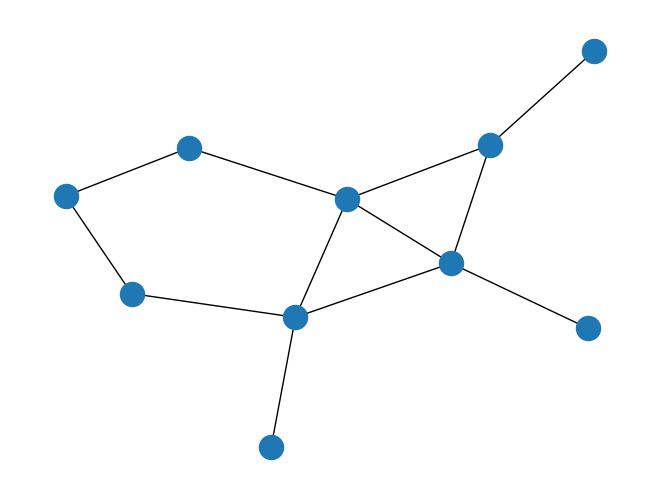

In [46]:
nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = RANDOM_SEED))
plt.show()

In [59]:
# create a runner class and solve the problem
ga = GARunner(problem=problem,
              experiment_name='max_k_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=1,
              max_attempts=1000,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10],
              mutation_rates=[0.01]
              )

# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run()

In [60]:
HTML(df_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:1].to_html())

,Iteration,Fitness,FEvals,Time,State
0,0,3.0,10,0.000828,"[1, 3, 0, 0, 3, 1, 3, 1, 3, 0]"


In [62]:
best_fitness = df_run_curves['Fitness'].max()
print(best_fitness)
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

8.0


In [63]:
minimum_evaluations = best_runs['FEvals'].min()

best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

In [64]:
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
8,8,0.01423,8.0,101.0,10,0.01,1024


In [65]:
best_mr = best_curve_run['Mutation Rate'].iloc()[0]
best_pop_size = best_curve_run['Population Size'].iloc()[0]
print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')


Best Mutation Rate: 0.01, best Population Size: 10


In [66]:
run_stats_best_run = df_run_stats[(df_run_stats['Mutation Rate'] == best_mr) & (df_run_stats['Population Size'] == best_pop_size)]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time']].to_html())

,Iteration,Fitness,FEvals,Time
0,0,3.0,10,0.000828
1,1,5.0,22,0.003216
2,2,5.0,33,0.005746
3,4,5.0,55,0.009555
4,8,8.0,101,0.014230
5,16,8.0,189,0.021200
6,32,8.0,365,0.036129
7,64,8.0,717,0.068935
8,128,8.0,1421,0.149339
9,256,8.0,2829,0.258158


In [67]:
best_state = run_stats_best_run[['State']].tail(1)
HTML(best_state.to_html())

,State
11,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]"


In [68]:
print([n for n in problem.source_graph.nodes])

[0, 1, 3, 9, 2, 4, 8, 5, 6, 7]


In [69]:
color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(ordered_state)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


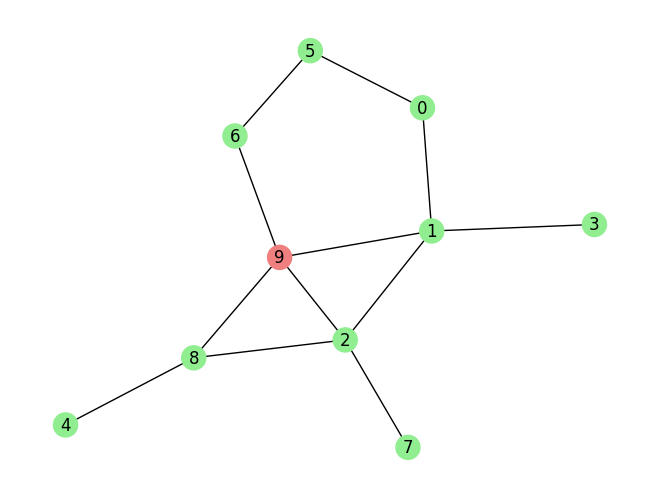

In [70]:
colors = ['lightcoral', 'lightgreen', 'yellow']
node_color_map = [colors[s] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3),
        with_labels=True,
        node_color=node_color_map)
plt.show()